In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KDTree
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [4]:
data=pd.read_csv(r"C:\Users\Chuxu\Desktop\WUSTL\Fall 2023\ESE417\winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Analysis

In [5]:
data=pd.read_csv("winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
fixed acidity,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


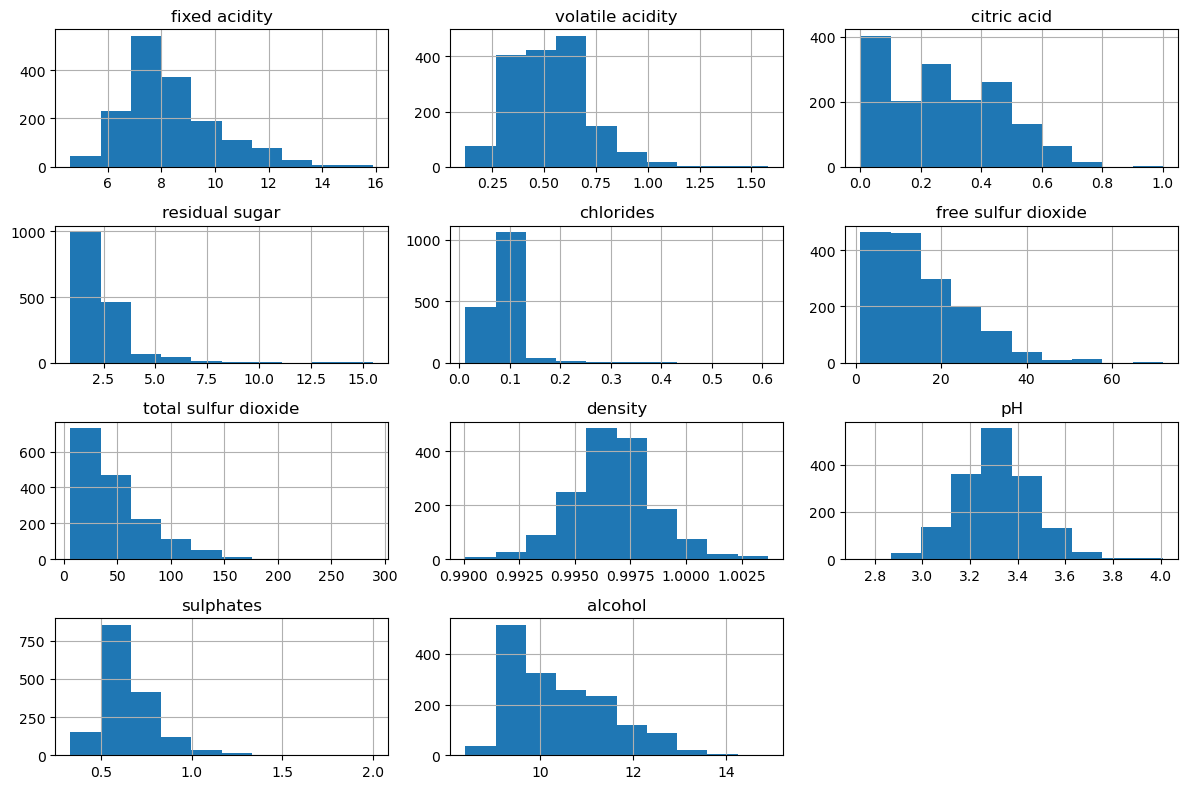

In [8]:
data.drop(['quality'],axis=1).hist(alpha=1,figsize=(12,8))
plt.tight_layout()
plt.show()

In [9]:
num_cols=['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

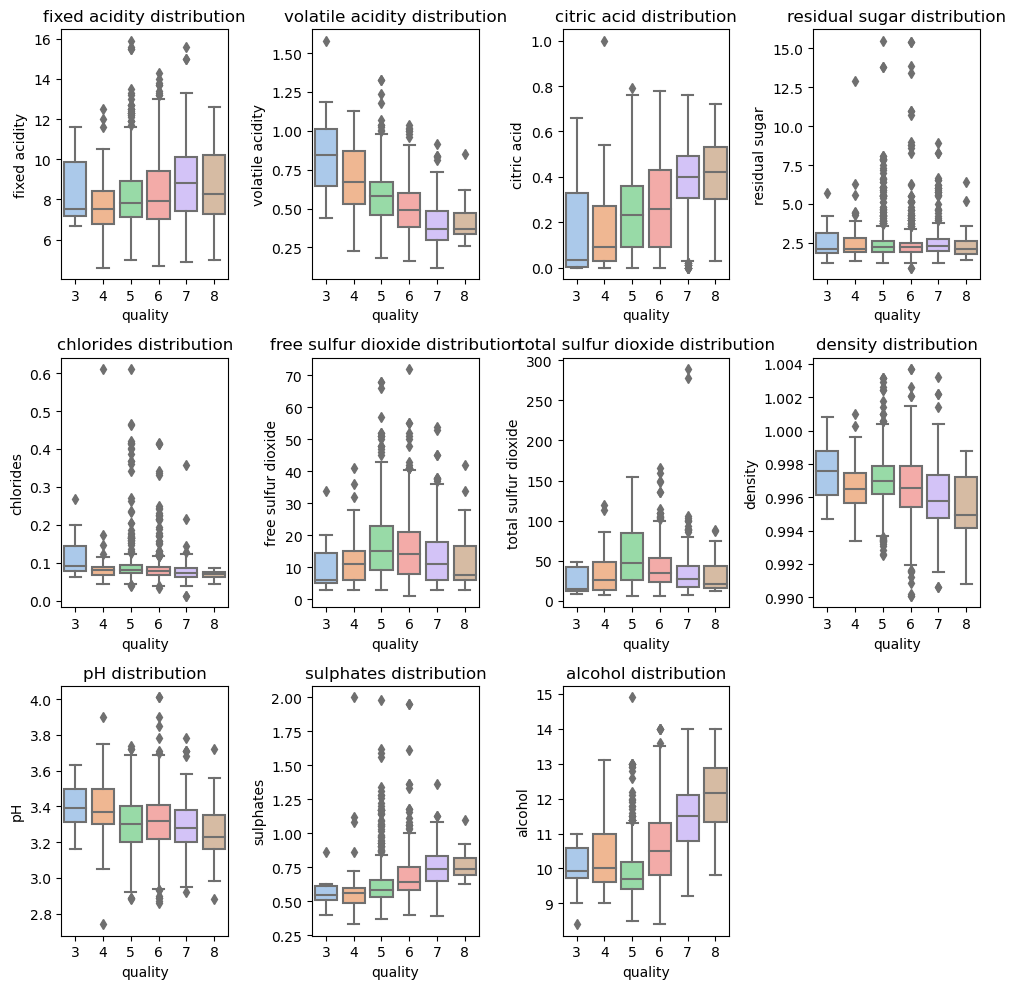

In [10]:
plt.figure(figsize=(10,10))

for idx, column in enumerate(num_cols):
    plt.subplot(len(num_cols)//4+1,4,idx+1)
    sns.boxplot(x="quality", y=column, data=data,palette="pastel")
    plt.title(f"{column} distribution")
    plt.tight_layout()
    plt.savefig("boxplot.pdf")

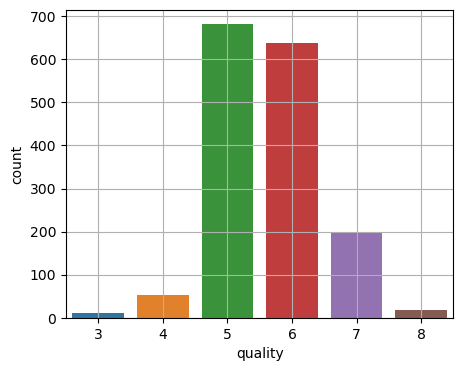

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='quality', data=data)
plt.grid(True)
plt.savefig("quality.pdf")

In [12]:
label=data["quality"]
data['mso2'] = data['free sulfur dioxide'] / (1 + 10**(data['pH'] - 1.81))
features=data.drop(['quality'],axis=1)
train_X,test_X,train_Y,test_Y=train_test_split(features,label,test_size=0.2,random_state=556)

Text(0.5, 1.0, 'Test Set')

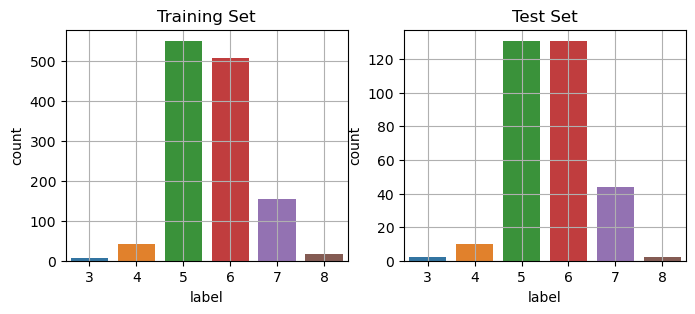

In [13]:
plt.figure(figsize=(8,3))

plt.subplot(121)
sns.countplot(x='label', data=pd.DataFrame({'label':train_Y}))
plt.grid(True)
plt.title("Training Set")

plt.subplot(122)
sns.countplot(x='label', data=pd.DataFrame({'label':test_Y}))
plt.grid(True)
plt.title("Test Set")

## PCA

In [23]:
train_X=StandardScaler().fit_transform(train_X)
test_X=StandardScaler().fit_transform(test_X)
PCA_feature=PCA(n_components=2).fit_transform(train_X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


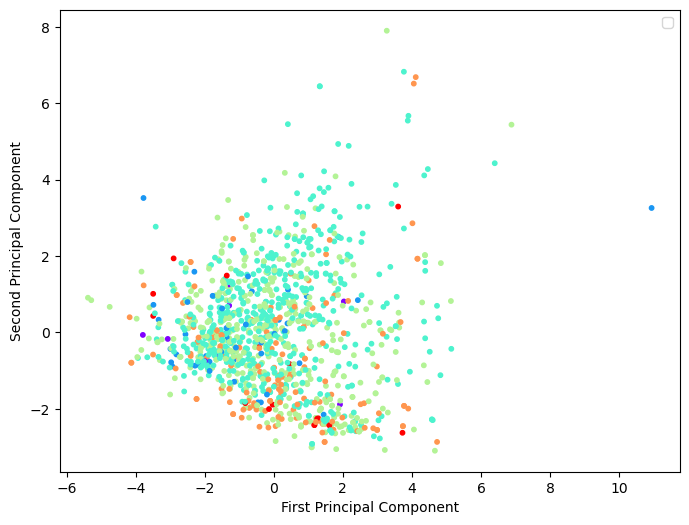

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(PCA_feature[:, 0], PCA_feature[:, 1], s=10, c=train_Y, cmap='rainbow')  
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

# Optional: SMOTE data augumentation

In [34]:
def SMOTE(features,target_num,K):
    class_num=np.shape(features)[0]
    np.random.shuffle(features)
    tree = KDTree(features)
    if target_num>class_num:
        synthetic_samples=np.zeros( (target_num-class_num,np.shape(features)[1]) )
    else:
        return features
    for i in range(0,target_num-class_num):
        dist, ind = tree.query(features[i%class_num:i%class_num+1], k=K)
        neighbour=features[ind[0]][np.random.randint(K)]
        gap=np.random.rand()
        synthetic_feature=features[i%class_num]+gap*(neighbour-features[i%class_num])
        synthetic_samples[i]=synthetic_feature
    return np.concatenate([features,synthetic_samples],axis=0)

In [35]:
np.random.seed(505)

balanced_features,balanced_labels=np.zeros((0,train_X.shape[1])),np.zeros((0))

for label in range(3,9):
    generated_features=SMOTE(train_X[train_Y==label],600,3)
    balanced_features=np.concatenate([balanced_features,generated_features],axis=0)
    balanced_labels=np.concatenate([balanced_labels,np.ones((generated_features.shape[0]))*label],axis=0)

shuffle_index=np.random.permutation(balanced_features.shape[0])
balanced_features=balanced_features[shuffle_index]
balanced_labels=balanced_labels[shuffle_index]

# Models

# Random Forest

In [ ]:
# data['mso2']=data['free sulfur dioxide']/(1+10**(data['pH']-1.81))
#refering to : https://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf

In [13]:
RandomForest_predictor=RandomForestClassifier()
parameters_space = {'criterion':['gini', 'entropy'],
      'n_estimators':[500,700,800],
 'min_samples_split':[2],
 'max_features':[3,4,5,6],
'class_weight':['balanced',None,'balanced_subsample']
 }

clf_RF = GridSearchCV(RandomForest_predictor, parameters_space,cv=3)
clf_RF.fit(train_X,train_Y)

print(clf_RF.best_score_)
print(clf_RF.best_params_)
print(clf_RF.best_estimator_.score(test_X,test_Y))

0.6708337456432584
{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 700}
0.65


In [14]:
clf_RF.best_estimator_.feature_importances_

array([0.05603839, 0.13340791, 0.06736776, 0.05942717, 0.10262377,
       0.0498849 , 0.07363491, 0.0711349 , 0.06193184, 0.11881964,
       0.12810196, 0.07762685])

In [16]:
from sklearn.inspection import permutation_importance

result=permutation_importance(clf_RF.best_estimator_, train_X,train_Y, n_repeats=10,random_state=505)

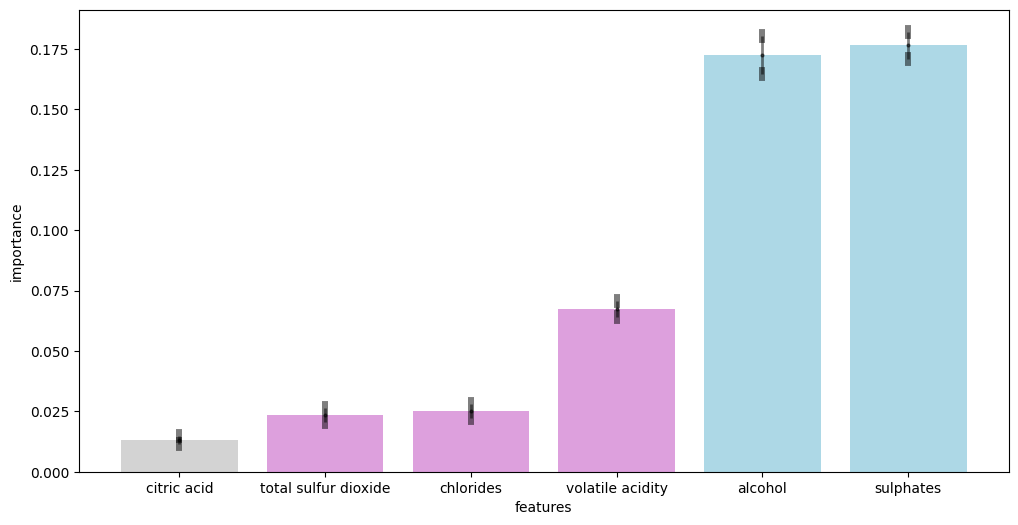

In [26]:
index=result['importances_mean'].argsort()[-6:]

x=np.array(['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
   'molecular sulfur dioxide'])[index]

y=result['importances_mean'][index]
yerr=result['importances_std'][index]
plt.figure(figsize=(12, 6))
plt.bar(x, y, color=['lightgray','plum','plum','plum','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
plt.xlabel('features')
plt.ylabel('importance')
plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
plt.savefig('featureimportance.pdf', dpi=400, transparent=True)
plt.show()


In [62]:
print(classification_report(test_Y,clf_RF.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000        10
           5     0.6974    0.8092    0.7491       131
           6     0.6143    0.6565    0.6347       131
           7     0.5714    0.3636    0.4444        44
           8     0.0000    0.0000    0.0000         2

    accuracy                         0.6500       320
   macro avg     0.3138    0.3049    0.3047       320
weighted avg     0.6155    0.6500    0.6276       320



In [94]:
for i in range(3,9):
  print(np.mean( (clf_RF.best_estimator_.predict(test_X)-test_Y)[test_Y==i]<=1 ))
print(np.mean( (clf_RF.best_estimator_.predict(test_X)-test_Y)<=1))

0.0
0.7
0.9923664122137404
1.0
1.0
1.0
0.98125


In [ ]:
clf_RF.best_estimator_.feature_importances_

array([0.07208864, 0.11389152, 0.0713422 , 0.0642346 , 0.07479024,
       0.09749077, 0.08719732, 0.06375531, 0.1129297 , 0.15746403,
       0.08481568])

In [98]:
print(clf_RF.best_estimator_.score(test_X,test_Y))
y_score=clf_RF.best_estimator_.predict_proba(test_X)
y_pred=clf_RF.best_estimator_.predict(test_X)

0.65


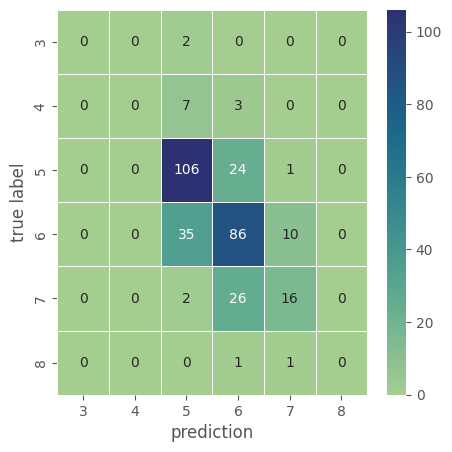

In [109]:
cm=confusion_matrix(test_Y.values, y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['3','4','5','6','7','8'],
            yticklabels=['3','4','5','6','7','8'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.savefig("CM.pdf")
plt.show()


In [99]:
label_binarizer = LabelBinarizer().fit(train_Y)
y_onehot_test = label_binarizer.transform(test_Y)

fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes=y_onehot_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


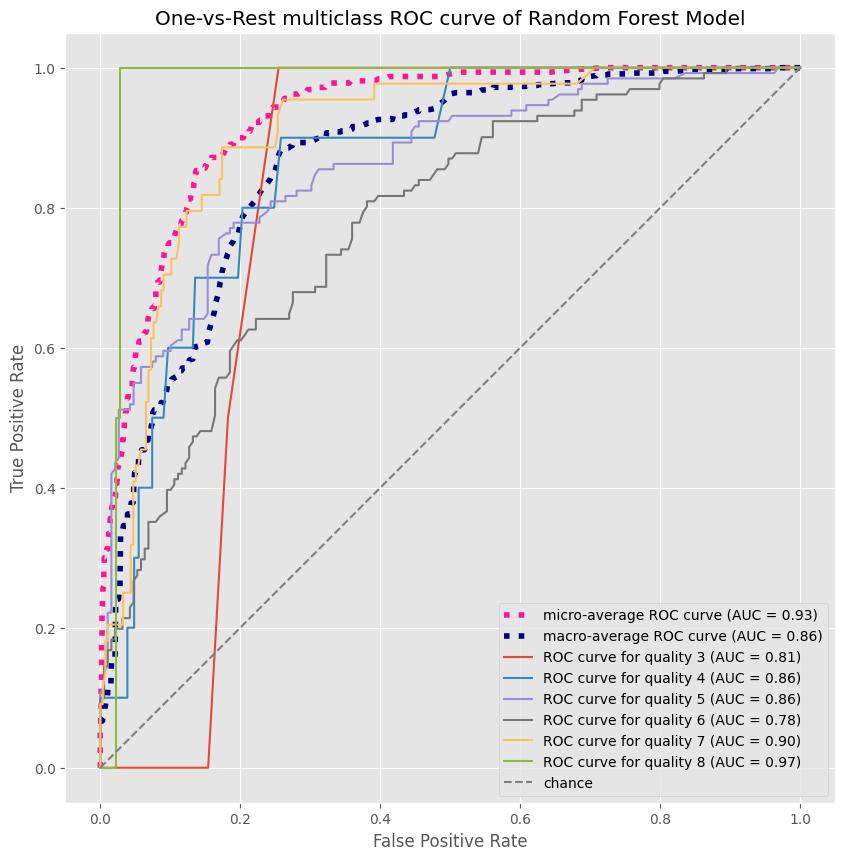

In [108]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)



# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
# for class_id, color in zip(range(n_classes), colors):
#     RocCurveDisplay.from_predictions(
#         y_onehot_test[:, class_id],
#         y_score[:, class_id],
#         name=f"ROC curve for {class_id}",
#         color=color,
#         ax=ax,
#         plot_chance_level=(class_id == 2),
#     )

for class_id in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for quality {3+class_id}",
        ax=ax,
        # plot_chance_level=(class_id == 2),
    )

plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'--',color='grey',label='chance')

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest multiclass ROC curve of Random Forest Model")
plt.legend()
plt.savefig("ROC.pdf")
plt.show()


## MLP Classifier

In [66]:
parameters = {'activation':['logistic','relu','tanh'],
              'solver':['adam','sdg'],
              #'max_iter': [1000,1500,2000],
              'alpha':10.0** -np.arange(1, 5),
              'learning_rate_init':10.0** -np.arange(1, 5),
              'hidden_layer_sizes':[50,100,200,(100,50),(200,100),(300,100)]}

In [67]:
clf_MLP = GridSearchCV(MLPClassifier(early_stopping=True,validation_fraction=0.2), parameters, n_jobs=-1, cv=3)
clf_MLP.fit(train_X, train_Y)
print(clf_MLP.best_score_)
print(clf_MLP.best_params_)
print(clf_MLP.best_estimator_.score(test_X,test_Y))

0.6121941118477715
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (200, 100), 'learning_rate_init': 0.01, 'solver': 'adam'}
0.575


In [96]:
for i in range(3,9):
print(np.mean( (clf_MLP.best_estimator_.predict(test_X)-test_Y)[test_Y==i]<=1 ))
print(np.mean( (clf_MLP.best_estimator_.predict(test_X)-test_Y)<=1))

0.0
0.7
0.9770992366412213
1.0
1.0
1.0
0.975


In [71]:
print(classification_report(test_Y,clf_MLP.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000        10
           5     0.6490    0.7481    0.6950       131
           6     0.5385    0.5878    0.5620       131
           7     0.3600    0.2045    0.2609        44
           8     0.0000    0.0000    0.0000         2

    accuracy                         0.5750       320
   macro avg     0.2579    0.2567    0.2530       320
weighted avg     0.5356    0.5750    0.5505       320



In [ ]:
clf_MLP.best_estimator_.score(test_X,test_Y)

0.540625

In [ ]:
y_pred=clf_MLP.best_estimator_.predict(test_X)
y_true=test_Y
cm=confusion_matrix(y_true,y_pred)
cm

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  3,  7,  0,  0],
       [ 0,  0, 62, 65,  4,  0],
       [ 0,  0, 16, 90, 25,  0],
       [ 0,  0,  1, 22, 21,  0],
       [ 0,  0,  0,  0,  2,  0]])

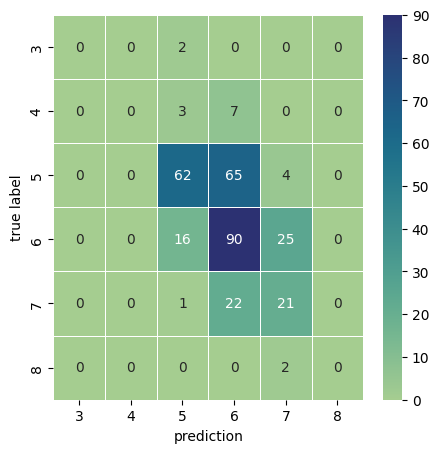

In [ ]:
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['3','4','5','6','7','8'],
            yticklabels=['3','4','5','6','7','8'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

## SVM

In [69]:
parameters = {'kernel':['rbf','poly','linear','sigmoid'],
              'C':[0.1,0.5,1,2,3,5],
              'degree':[3,5,7],
              'gamma':['scale','auto']}

clf_SVM = GridSearchCV(SVC(), parameters, n_jobs=-1,cv=5)
clf_SVM.fit(train_X, train_Y)
print(clf_SVM.best_score_)
print(clf_SVM.best_params_)
print(clf_SVM.best_estimator_.score(test_X,test_Y))

0.6208180147058824
{'C': 3, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
0.596875


In [95]:
for i in range(3,9):
  print(np.mean( (clf_SVM.best_estimator_.predict(test_X)-test_Y)[test_Y==i]<=1 ))
print(np.mean( (clf_SVM.best_estimator_.predict(test_X)-test_Y)<=1))

0.0
0.8
0.9770992366412213
1.0
1.0
1.0
0.978125


In [70]:
print(classification_report(test_Y,clf_SVM.best_estimator_.predict(test_X),digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000        10
           5     0.6335    0.7786    0.6986       131
           6     0.5906    0.5725    0.5814       131
           7     0.4667    0.3182    0.3784        44
           8     0.0000    0.0000    0.0000         2

    accuracy                         0.5969       320
   macro avg     0.2818    0.2782    0.2764       320
weighted avg     0.5653    0.5969    0.5760       320



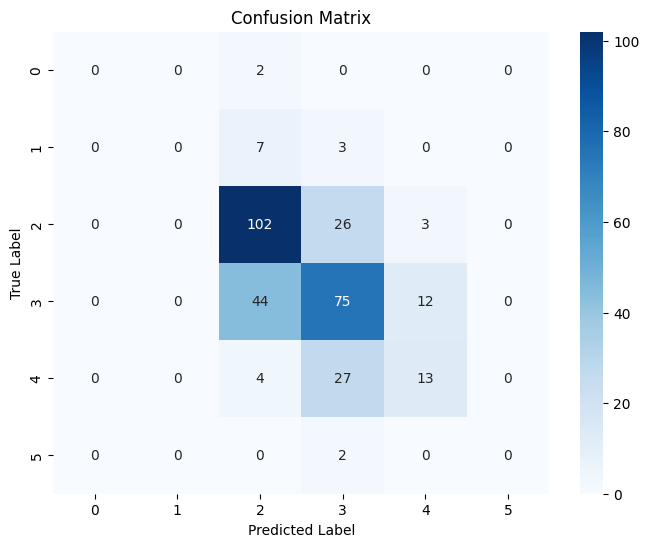

In [ ]:
best_model = clf_SVM.best_estimator_
predictions = best_model.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()





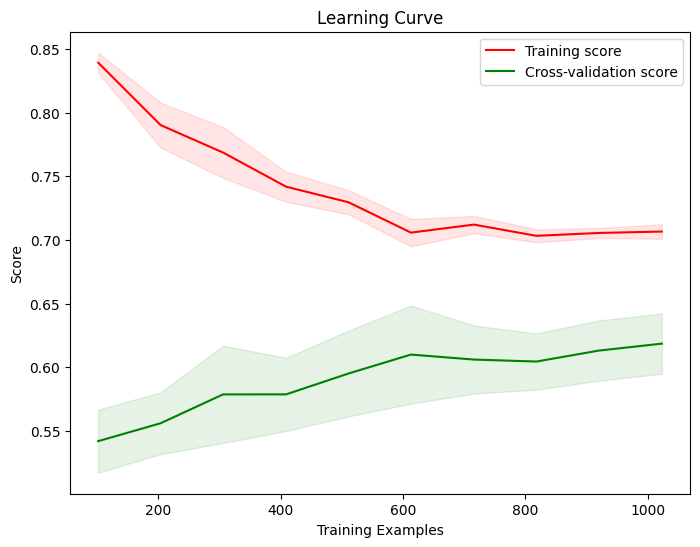

In [ ]:
model = SVC(kernel='rbf', C=2, degree=3, gamma='auto')
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=train_X,
    y=train_Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

plt.plot(train_sizes, validation_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()
